In [ ]:
# Specify the path of the uploaded ZIP file
dataset = '/content/Face Mask.zip'

# Importing the necessary library for extracting the ZIP file
from zipfile import ZipFile

# Extracting the ZIP file
with ZipFile(dataset, 'r') as zip:
    zip.extractall('/content/')  # Specify the destination folder if needed
    print('The dataset has been extracted successfully.')


The dataset has been extracted successfully.


In [ ]:
!ls

 data  'Face Mask.zip'	 sample_data


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1209.jpg', 'with_mask_2099.jpg', 'with_mask_1539.jpg', 'with_mask_1105.jpg', 'with_mask_2282.jpg']
['with_mask_3467.jpg', 'with_mask_1132.jpg', 'with_mask_495.jpg', 'with_mask_108.jpg', 'with_mask_1954.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3045.jpg', 'without_mask_2225.jpg', 'without_mask_3274.jpg', 'without_mask_3581.jpg', 'without_mask_2577.jpg']
['without_mask_1551.jpg', 'without_mask_244.jpg', 'without_mask_1804.jpg', 'without_mask_2241.jpg', 'without_mask_2685.jpg']


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


In [ ]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


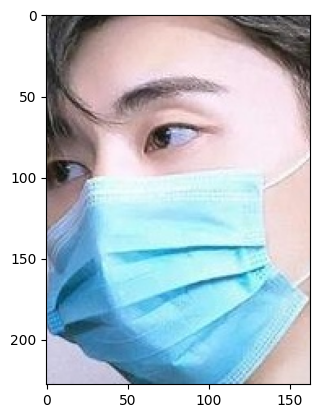

In [ ]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

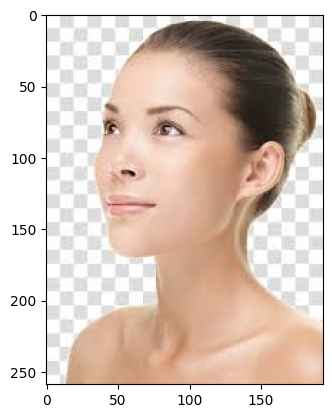

In [ ]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

array([[[ 42,  49,  41],
        [ 44,  51,  43],
        [ 51,  58,  50],
        ...,
        [ 50,  36,  40],
        [ 52,  37,  40],
        [ 53,  37,  40]],

       [[ 42,  49,  41],
        [ 44,  51,  43],
        [ 50,  57,  49],
        ...,
        [ 47,  33,  37],
        [ 49,  34,  37],
        [ 49,  34,  37]],

       [[ 42,  49,  41],
        [ 43,  50,  42],
        [ 47,  54,  47],
        ...,
        [ 40,  28,  33],
        [ 41,  28,  32],
        [ 41,  28,  32]],

       ...,

       [[253, 250, 246],
        [254, 250, 245],
        [255, 249, 244],
        ...,
        [218, 193,  87],
        [218, 193,  87],
        [218, 193,  87]],

       [[249, 245, 242],
        [250, 246, 243],
        [252, 249, 245],
        ...,
        [219, 194,  89],
        [220, 194,  89],
        [220, 194,  89]],

       [[247, 243, 241],
        [248, 245, 242],
        [251, 249, 245],
        ...,
        [220, 194,  89],
        [221, 194,  89],
        [221, 194,  89]]], dtype=uint8)
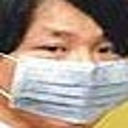

In [ ]:
data[0]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[229, 233, 234],
        [221, 225, 226],
        [212, 216, 217],
        ...,
        [247, 247, 247],
        [246, 246, 246],
        [246, 246, 246]],

       [[228, 232, 233],
        [220, 224, 225],
        [211, 215, 216],
        ...,
        [246, 246, 246],
        [245, 245, 245],
        [245, 245, 245]],

       [[227, 231, 232],
        [219, 223, 224],
        [210, 214, 215],
        ...,
        [245, 245, 245],
        [244, 244, 244],
        [244, 244, 244]]], dtype=uint8)
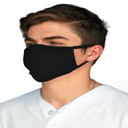

In [ ]:
X_train[0]

In [ ]:
X_train_scaled[0]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.89803922, 0.91372549, 0.91764706],
        [0.86666667, 0.88235294, 0.88627451],
        [0.83137255, 0

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 16s 53ms/step - acc: 0.7202 - loss: 0.6660 - val_acc: 0.9107 - val_loss: 0.2556
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - acc: 0.8921 - loss: 0.2921 - val_acc: 0.8793 - val_loss: 0.3042
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - acc: 0.9080 - loss: 0.2449 - val_acc: 0.9140 - val_loss: 0.2300
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - acc: 0.9232 - loss: 0.1871 - val_acc: 0.9091 - val_loss: 0.2334
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9409 - loss: 0.1543 - val_acc: 0.9223 - val_loss: 0.2267


Model Evaluation


In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - acc: 0.9222 - loss: 0.1921
Test Accuracy = 0.921244204044342


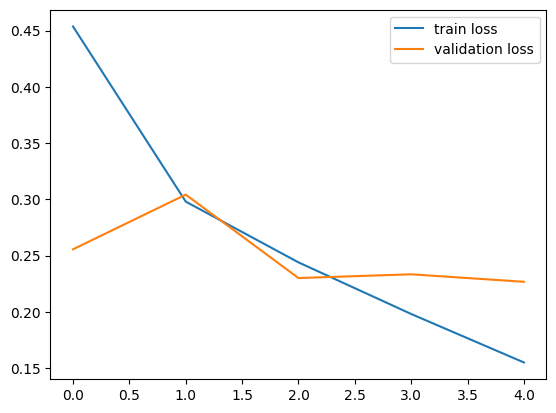

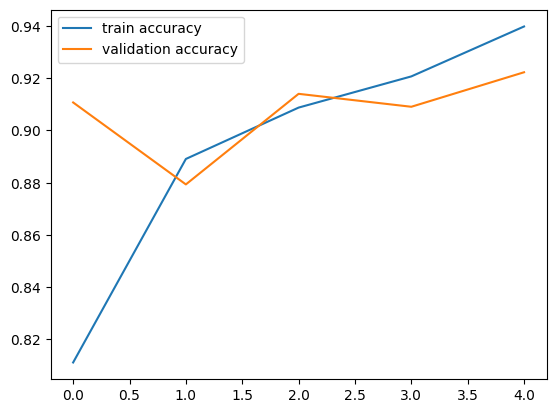

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Predictive System

Path of the image to be predicted: test.jpg


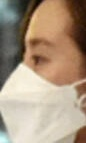

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 682ms/step
[[0.31676355 0.82451606]]
1
The person in the image is wearing a mask


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

if input_image is None:
    print("Error: Image could not be loaded. Please check the file path.")
else:
    cv2_imshow(input_image)

    input_image_resized = cv2.resize(input_image, (128, 128))

    input_image_scaled = input_image_resized / 255

    input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])

    input_prediction = model.predict(input_image_reshaped)

    print(input_prediction)

    input_pred_label = np.argmax(input_prediction)

    print(input_pred_label)

    if input_pred_label == 1:
        print('The person in the image is wearing a mask')
    else:
        print('The person in the image is not wearing a mask')


Path of the image to be predicted: yo.jpg


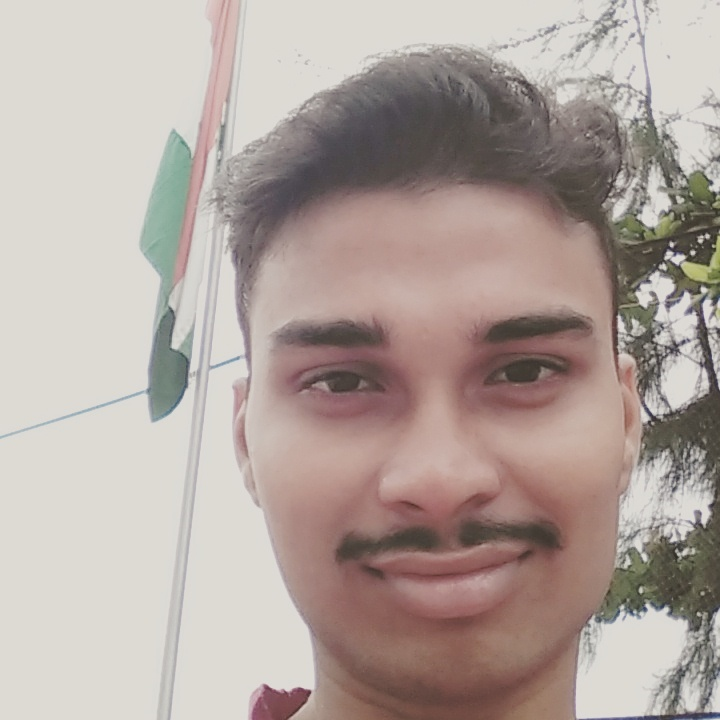

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[[0.28625908 0.8271238 ]]
1
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')